# Intermediate data wrangling hands-on
Практика з обробки даних

## Data wrangling.
The process of cleaning, structuring, and enriching raw data into a desired format for streamlining of the future analysis. It's a crucial step in the data analysis process. Real world data is often messy, and needs significant efforts to update before being usable.

Обробка даних.
Процес очистки, структурування та збагачення необроблених даних до потрібного формату для спрошення подальшого аналізу. Це важливий крок у процесі аналізу даних. Справжні дані часто погано організовані та потребують значних зусиль для доведення перед використанням.

### Refresher: Preparation and loading of the dataset

Повторення: Підготовка та завантаження набору даних

Let's load up the libraries needed for our todays hands-on (**import** command)

Спочатку підвантажимо потрібні бібліотеки (команда **import**)

In [5]:
import pandas as pd
import numpy as np
import os

**`.read_excel()`** is a function in the Pandas library that is used to read an Excel file into a DataFrame object(like read_csv).

**`.read_excel()`** - функція бібліотеки Pandas, яка використовується для читання файлу Excel в об'єкт DataFrame (як read_csv).

In [6]:
path = os.getcwd()

In [7]:
path

'/Users/anastasiiahorlova/Desktop/UBDS-3-2024-Py-Intro'

In [8]:
rom_df = pd.read_excel(path+'/content/RO.xlsx')

ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

Let's explore the dataframe with **.head()**

Давайте дослідимо набір даних за допомогою **.head()**

In [ ]:
rom_df.head(2)

,Unnamed: 0,Unnamed: 1,Romania Data collection,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,ID,Nat_RO,Nat_ROHU,Sex_M,Sex_F,Age_18-25,Age_26-30,Age_31-40,Age_41-45,Age_46-50,...,Age_56-60,Age_61-65,Age_65-70,Age_over 70,Part_rural,Part_urban,Par_rural,Par_urban,Gpar_rural,Gp_urban
1,SM1,1,NaN,1,NaN,NaN,NaN,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,1,NaN,1,1,NaN


We can see, this excel table has a lot of issues and has to be worked on. Hint - check the documentation or ask ChatGPT about skip_rows parameter.
https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html

Ми бачимо, ця таблиця Excel має багато проблем, і над нею потрібно попрацювати. Підказка - зверніться до документації або запитайте ChatGPT про параметр skip_rows.
https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html

Pandas has support for various formats to read in to a dataframe(for some - with the import of additional library) - CSV, Excel files, SQL data, JSON, HTML and even reading from clipboard.
Please refere to pandas documentation.

Pandas підтримує різні формати для читання у dataframe (іноді- з імпортом додаткової бібліотеки) - CSV, файли Excel, дані SQL, JSON, HTML і навіть читання з буфера обміну.
Документація Pandas вам в поміч.

## Modifying the column names, their order and concatenatenation of the dataset
Will be added after the sumbissions, as currently we expect you to use GPT to get help with these parts!

### Series and Dataframes

While Dataframe in pandas is a 2 dimensional dataset containg our data, by slicing only one column we produce an entitiy called Series.
Note that series is a one-dimensional entity, that in many ways functions similar to dataset, but you can encounter a scenario when it differs. Significant number of functions we will discuss today work primarily on Series objects.

Хоча Dataframe в pandas - це двовимірний набір даних, що містить наші дані, якщо ви зробите зріз на один стовпчик, то отримуємо інший тип даних, яка називається Series.
Зверніть увагу, що Series- це одновимірна сутність, яка багато в чому функціонує подібно до набору даних, але ви можете зіткнутися з ситуацією, коли вони відрізняються.
Значна кількість функцій, про які ми сьогодні поговоримо, працюють переважно з об'єктами типу Series.

In [ ]:
df = pd.DataFrame({'Name': ['Tom', 'William Rick', 'John', 'Albert', np.nan, '1234','SteveSmith'],
                   'Job': ['Teacher', 'Engineer', 'Doctor', 'Scientist', np.nan, '1234','Analyst']})
df.head()

,Name,Job
0,Tom,Teacher
1,William Rick,Engineer
2,John,Doctor
3,Albert,Scientist
4,NaN,NaN


In [ ]:
df['Name']

0             Tom
1    William Rick
2            John
3          Albert
4             NaN
5            1234
6      SteveSmith
Name: Name, dtype: object

In [ ]:
df['Name'][2]

'John'

## .loc() and .iloc()

**.loc()** is label-based data selection method which means that we have to pass the name of the row or column which we want to select. This method includes the last element of the range passed in it, unlike **iloc()**. **iloc()** is a indexed-based selection method which means that we have to pass integer index in the method to select specific row/column.



In [ ]:
df = pd.DataFrame(np.random.randn(8, 4), index = ['a','b','c','d','e','f','g','h'], columns = ['A', 'B', 'C', 'D'])
df.head()

,A,B,C,D
a,-0.228502,-1.889629,-1.968725,-0.264024
b,-1.145627,-1.181180,-0.219594,0.095363
c,0.062871,0.086351,0.618924,2.711029
d,-0.027729,-0.870907,-0.577136,1.736883
e,2.440559,-0.220987,0.831204,1.120078


As the number

In [ ]:
df.loc["a","B":'D']

B   -1.889629
C   -1.968725
D   -0.264024
Name: a, dtype: float64

In [ ]:
df.iloc[1:4 , 2]

b   -0.219594
c    0.618924
d   -0.577136
Name: C, dtype: float64

Alternative way to access the data
Альтернативний спосіб доступу до даних

In [ ]:
df['B']['a']

1.3703321262486023

## Working with text
Робота з текстом

Pandas provides a set of string functions which make it easy to operate on string data. These functions always ignore (or exclude) missing/NaN values.

Pandas надає набір рядкових функцій, які спрощують роботу з рядковими даними. Ці функції ігнорують (або виключають) пропущені/NaN значення.

**lower()** method returns the lowercased string from the series of string.

**upper()** method returns the uppercased string from the series of string.

**len()** method returns length of each element in the series.

**split()** method returns a list of words separated by the separator.


Метод **lower()** повертає рядок у нижньому регістрі з series рядків.

Метод **upper()** повертає рядок у верхньому регістрі з series рядків.

Метод **len()** повертає довжину кожного елемента в series.

Метод **split()** повертає список слів, розділених роздільником.

In [ ]:
df = pd.DataFrame({'Name': ['Tom', 'William Rick', 'tom', 'Albert','1234','SteveSmith'],
                   'Job': ['Teacher', 'Engineer', 'Doctor', 'Scientist', '1234','Analyst']})
df.head()

,Name,Job
0,Tom,Teacher
1,William Rick,Engineer
2,tom,Doctor
3,Albert,Scientist
4,1234,1234


In [ ]:
df['Name'].str.lower()

0             tom
1    william rick
2             tom
3          albert
4             NaN
5            1234
6      stevesmith
Name: Name, dtype: object

In [ ]:
df['Job'].str.upper()

0      TEACHER
1     ENGINEER
2       DOCTOR
3    SCIENTIST
4          NaN
5         1234
6      ANALYST
Name: Job, dtype: object

In [ ]:
df['Name'].str.split(' ')

0              [Tom]
1    [William, Rick]
2              [tom]
3           [Albert]
4             [1234]
5       [SteveSmith]
Name: Name, dtype: object

In [ ]:
df['Name'].str.len()

0     3
1    12
2     3
3     6
4     4
5    10
Name: Name, dtype: int64

## Handling Missing and Categorical Data

Real world data is often messy and contains missing values and non-numeric data types.

Обробка пропущених даних і категорій

Реальні дані часто бувають заплутаними, містять пропущені значення та нечислові типи даних.

Handling Missing Data
Pandas provides various methods for cleaning the missing values. The **fillna()** function can “fill in” NA values with non-null data in a couple of ways, which we have illustrated below:

In [ ]:
df = pd.DataFrame(np.random.randn(5, 3), index=['a', 'c', 'e', 'f', 'h'], columns=['one', 'two', 'three'])
df = df.reindex(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])
df['one']['a'] = np.nan

df.head()

,one,two,three
a,NaN,-0.463638,-0.634216
b,NaN,NaN,NaN
c,-0.374116,-0.401143,0.042807
d,NaN,NaN,NaN
e,2.014170,-0.423685,-1.677568


### Detecting missing data

Pandas provides the **isnull()** and **notnull()** functions to detect missing data. These functions can be used to find the rows or columns with missing data.

Виявлення відсутніх даних

Pandas має функції **isull()** та notnull() для виявлення пропущених даних. Ці функції можна використовувати для пошуку рядків або стовпців з відсутніми даними.

In [ ]:
df.isnull()

,one,two,three
a,True,False,False
b,True,True,True
c,False,False,False
d,True,True,True
e,False,False,False
f,False,False,False
g,True,True,True
h,False,False,False


In [ ]:
df.notnull()

,one,two,three
a,False,True,True
b,False,False,False
c,True,True,True
d,False,False,False
e,True,True,True
f,True,True,True
g,False,False,False
h,True,True,True


### Filling missing values

Replace NaN with a value using **fillna()**

Заповнення пропущених значень

Замінити NaN значенням за допомогою **fillna()**.

In [ ]:
df.fillna(0)

,one,two,three
a,0.000000,-0.463638,-0.634216
b,0.000000,0.000000,0.000000
c,-0.374116,-0.401143,0.042807
d,0.000000,0.000000,0.000000
e,2.014170,-0.423685,-1.677568
f,0.754947,-0.663514,0.000450
g,0.000000,0.000000,0.000000
h,0.289916,0.847724,-1.960637


In [ ]:
df.fillna("AAAA")

,one,two,three
a,AAAA,-0.463638,-0.634216
b,AAAA,AAAA,AAAA
c,-0.374116,-0.401143,0.042807
d,AAAA,AAAA,AAAA
e,2.01417,-0.423685,-1.677568
f,0.754947,-0.663514,0.00045
g,AAAA,AAAA,AAAA
h,0.289916,0.847724,-1.960637


We can fill the values using mean of non-NaN values of every column using **fillna()** and **mean()**. Informed(or based on methods) filling of empty values is often called imputation.

Ми можемо заповнити значення, використовуючи середнє значення непустих значень кожного стовпчика за допомогою **fillna()** та **mean()**. Інформоване (або засноване на методах) заповнення порожніх значень часто називають імпутацією.

In [ ]:
df

,one,two,three
a,NaN,-0.463638,-0.634216
b,NaN,NaN,NaN
c,-0.374116,-0.401143,0.042807
d,NaN,NaN,NaN
e,2.014170,-0.423685,-1.677568
f,0.754947,-0.663514,0.000450
g,NaN,NaN,NaN
h,0.289916,0.847724,-1.960637


In [ ]:
df.mean()

one      0.671229
two     -0.220851
three   -0.845833
dtype: float64

In [ ]:
df.fillna(df.mean())

,one,two,three
a,0.671229,-0.463638,-0.634216
b,0.671229,-0.220851,-0.845833
c,-0.374116,-0.401143,0.042807
d,0.671229,-0.220851,-0.845833
e,2.014170,-0.423685,-1.677568
f,0.754947,-0.663514,0.000450
g,0.671229,-0.220851,-0.845833
h,0.289916,0.847724,-1.960637


More approaches are available with some statistics thinking.

## Data replacement and translation
Заміна та переклад даних

The **.replace()** function in pandas is a versatile tool that allows you to replace values in a DataFrame or Series. This function is quite flexible and can work with a variety of data structures such as scalars, lists, dictionaries, and even functions.

BEWARE, replacing data might create problems if done irresposibly. Try to aviod replacing data in the same colum as the original data is, and excercise extreme caution.

Функція **.replace()** в pandas - це універсальний інструмент, який дозволяє замінювати значення у датафреймі або series. Ця функція досить гнучка і може працювати з різними структурами даних, такими як числові значення, списки, словники і навіть функції.

ОБЕРЕЖНО, заміна даних може спричинити проблеми, якщо робити це необережно. Намагайтеся уникати заміни даних у тому самому стовпчику, що й оригінальні дані, і будьте дуже-дуже-дуже обережні.

In [ ]:
df = pd.DataFrame({'A': [0, 1, 2, 3, 4],
                   'B': [5, 6, 7, 8, 9]})
df

,A,B
0,0,5
1,1,6
2,2,7
3,3,8
4,4,9


In [ ]:
df.replace(0,-1)
#df2 = df.replace(0,-1)
#df2[Aupd] = df[A].replace(0,-1)

,A,B
0,-1,5
1,1,6
2,2,7
3,3,8
4,4,9


**Replacing with a list**

If you have multiple values that you want to replace, you can provide two lists to the **.replace()** function: one with the values to be replaced and the other with their replacements. Both lists must be of the same length.

Заміна списком

Якщо ви маєте декілька значень, які потрібно замінити, ви можете передати функції **.replace()** два списки: один зі значеннями, які потрібно замінити, а інший - з їхніми замінами. Обидва списки повинні мати однакову довжину.

In [ ]:
df.replace([0, 1], ["A", "B"])

,A,B
0,A,5
1,B,6
2,2,7
3,3,8
4,4,9


**Replacing with a dictionary**

A dictionary can be used to replace specific values from specific columns. The keys of the dictionary are the values to be replaced and the values of the dictionary are their replacements.

In [ ]:
df

,A,B
0,0,5
1,1,6
2,2,7
3,3,8
4,4,9


In [ ]:
df.replace({'A': {0: "A", 1: -2}, 'B': {5: -1, 6: "B"}})

,A,B
0,A,-1
1,-2,B
2,2,7
3,3,8
4,4,9


## Categorical Data

Categorical data are variables that contain label values rather than numeric values. Many analysis methods can not operate on label data directly. They require all input variables and output variables to be numeric.

Категорійні дані - це змінні, значення яких - рядки, а не числові значення. Багато методів аналізу даних не можуть оперувати безпосередньо з рядками. Вони потребують, щоб усі вхідні та вихідні змінні були числовими.

In [ ]:
df = pd.DataFrame({"A": ["foo", "foo", "foo", "foo", "foo",
                         "bar", "bar", "bar", "bar"],
                   "B": ["one", "one", "one", "two", "two",
                         "one", "one", "two", "two"],
                   "C": ["small", "large", "large", "small",
                         "small", "large", "small", "small",
                         "large"],
                   "D": [1, 2, 2, 3, 3, 4, 5, 6, 7],
                   "E": [2, 4, 5, 5, 6, 6, 8, 9, 9]})
df

,A,B,C,D,E
0,foo,one,small,1,2
1,foo,one,large,2,4
2,foo,one,large,2,5
3,foo,two,small,3,5
4,foo,two,small,3,6
5,bar,one,large,4,6
6,bar,one,small,5,8
7,bar,two,small,6,9
8,bar,two,large,7,9


The most common way to encode categorical variables is one-hot encoding. The **get_dummies()** function is used for this purpose.

Найпоширенішим способом кодування категоріальних змінних є one-hot кодування. Для цього використовується функція **get_dummies()**.

In [ ]:
df_one_hot = pd.get_dummies(df, columns=["A", "B", "C"], prefix=["col_A", "col_B", "col_C"])
df_one_hot

,D,E,col_A_bar,col_A_foo,col_B_one,col_B_two,col_C_large,col_C_small
0,1,2,0,1,1,0,0,1
1,2,4,0,1,1,0,1,0
2,2,5,0,1,1,0,1,0
3,3,5,0,1,0,1,0,1
4,3,6,0,1,0,1,0,1
5,4,6,1,0,1,0,1,0
6,5,8,1,0,1,0,0,1
7,6,9,1,0,0,1,0,1
8,7,9,1,0,0,1,1,0


Note that label encoding has introduced new problems in our data, as some classic python and pandas methods will be less informative(for example .value_counts(), hint - check what it does). Additionaly, most plotting libraries will not work well with this kind of data.

Зверніть увагу, що кодування рядків створило нові проблеми в наших даних оскільки деякі класичні методи python and pandas будуть менш інформативними (наприклад, .value_counts(), підказка - перевірте, що він робить). Крім того, більшість бібліотек побудови графіків не будуть добре працювати з такими даними.

# Hands-on assignment

For our hands on assignment we will be performing data wrangling techniques. This assigmnet is based on a real-world data sample collection by 2 different centers in Ukraine and Romania.
You are provided with 3 files to work with and combine into a single dataframe.
https://drive.google.com/drive/folders/1fvEI70KUf-pwWsXnziodC7ipJs-Dtjf3?usp=share_link

Для нашого практичного завдання ми будемо використовувати методи роботи з даними. Це завдання базується на реальних заборах даних, зібраних 2 різними центрами в Україні та Румунії.
Вам буде надано 3 файли для роботи виконання завдань.
https://drive.google.com/drive/folders/1fvEI70KUf-pwWsXnziodC7ipJs-Dtjf3?usp=share_link


## Tentative instructions

1. Explore the data files.
2. Get access to the data in google collab(either upload files or connect to your google drive). Use ChatGPT to learn, how to skip first row of the Excel file.
3. Merge the UA and UA2 datasets into a single datarfame
4. Identify columns that contain similar information but are writted down differently. Pay extra attention to the column names, as they might contain spaces and other hard-to-notice symbols.
5. Develop a strategy to fix the AGE part and Rural\Urban of dataset between Ukrainian and Romainan datafile so the data can be seamlessly merged.
6. Use ChatGPT or Bard to rename the columns between dataframes so they can be added\concatenated (Use GPT to learn how to cocatenate 2 datasets)
7. Produce summary statistics(hint - **describe** the data)
8. Report the number of people above 40 that lived in urban areas total.
9. Produce the same stats for Romania and Ukraine separately.
10. Produce a merged dataframe with normalized Data as result.csv.

## Орієнтовні інструкції

1. Ознайомтеся з файлами даних.
2. Отримайте доступ до даних в google collab (завантажте файли, або підключіть до вашого google-диску). Використовуйте ChatGPT, щоб дізнатися, як пропустити перший рядок файлу Excel.
3. Об'єднайте датафрейми UA та UA2 в один датафрейм.
4. Визначте стовпці, які містять схожу інформацію, але записані по-різному. Зверніть увагу на назви стовпців, оскільки вони можуть містити пробіли та інші малопомітні символи.
5. Розробіть стратегію виправлення частини AGE(вік) та Rural\Urban(місто\село) набору даних між українським та румунським файлом даних, щоб їх було об'єднати.
6. Використовуйте ChatGPT або Bard для перейменування стовпців у датафреймах до однакового формату, щоб їх можна було додати\об'єднати (використовуйте GPT, щоб дізнатися, як об'єднати 2 датафрейми).
7. Створіть зведену статистику (підказка - **describe** дані)
8. Підрахуйте загальну кількість людей старше 40 років, які проживають у міських поселеннях.
9. Підготуйте таку ж статистику окремо для Румунії та України.
10. Створіть об'єднаний датафрейм з нормалізованими даними -  result.csv.





You have to do the following.

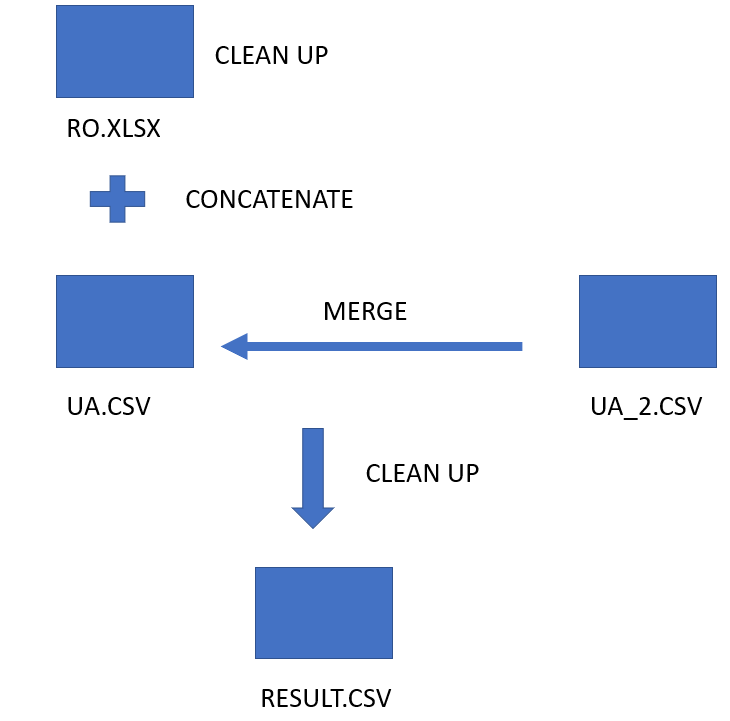

## Problems you will encounter (will be updated)



*   First row of the Excel file table does not contain useful information and is a bad header. You will have to skip it or designate the row 1(as counting starts with 0 in python) as the header.
*   Some of the column names have problems (for example, if a column has a hidden space in it's name - it will be harder to work with - 'Age ' is not equal "Age"). Use **df.columns** to diagnose

